# Exercícios

Para solução desses exercícios, a utilização da biblioteca scikitlearn (http://scikit-learn.org/stable/index.html) é permitida e encorajada.

### Exercício 1

1. Leia o arquivo dataset.data que está na pasta "dataset" e plote o dataset para conhecer um pouco melhor a distribuição dos pontos.

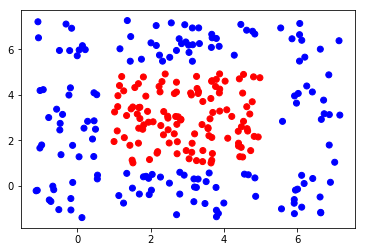

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt


dataset = pd.read_csv('./dataset/dataset.data', sep = ';')
color= ['red' if l == 'A' else 'blue' for l in dataset.iloc[:,2]]
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c=color)

plt.show()

Utilize o classificador SVM visto em aula, escolhendo um kernel adequado que separe totalmente os dados. Justifique a sua escolha, dizendo intuitivamente o motivo de ter escolhido o kernel e os parâmetros utilizados.

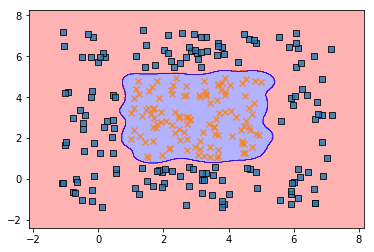

In [15]:
#O classificador SVM com kernel gaussiano foi escolhido devido à divisão dos pontos em dois grupos claros, 
#um externo e um interno. 
#O parametro gama foi escolhido por teste manual, com escolha de um com 100% de classificação correta e
#mínimo overfitting notavel. 

%run ml/mlplot.py


x = dataset.iloc[:,0]
y = dataset.iloc[:,1]
obs = dataset.iloc[:,0:2]
target = dataset.iloc[:,len(dataset.columns)-1]


from sklearn import svm

clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



obs = obs.values
target = target.values
target = np.where(target == 'A', 1, 0)

clf.fit(obs, target)  
plot_decision_regions(obs,target,clf)

### Exercício 2

Nesses Exercícios, vamos trabalhar com *Seleção de Características*. Para isso, vamos utilizar os dados localizados no arquivo "data_breast_cancer.csv" que está na pasta "dataset". Esse arquivo esta no formato csv e contêm 3226 variáveis (genes ou "probes") e 22 amostras (pacientes), das quais 7 amostras são da classe BRACA1, 8 da classe BRACA2 e 7 da classe SPORADIC.

Os dados estão organizados em uma matriz com linhas representando as expressões gênicas de um dado transcrito e as colunas representando as diferentes amostras (pacientes). A primeira coluna fornece o nome do gene e a última linha contém os nomes da classe.

2.1) O primeiro passo desse exercício consiste em ler esses dados em formato utilizável pelos classificadores do scikitlearn. Ou seja, ler os dados do arquivo e formatar os dados em X e y, onde X é uma matriz onde cada linha é um vetor com os valores das características de uma amostra e y e um vetor onde cada elemento é uma classe e está associado a uma amostra de X pelo seu índice. Remova também os dados de cabeçalho (nome do gene, identificador de paciente).

In [170]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/data_breast_cancer.csv')
df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])


X =  df.iloc[:,0:len(df.columns)-1]
y =  df.iloc[:,len(df.columns)-1]

print(X.head())
print(y.head())


Genes HK1A1 HK1A2 HK1A4 HK1A5 HK1A6 HK1A7 HK1A8 HK1A9 HK1A10 HK1A11   ...    \
P01    0.15  1.54  1.72  0.71  0.94   0.8  0.78  0.27   1.84   0.82   ...     
P02    0.22  1.27  1.57  1.24  1.53  0.95  0.81  0.35   1.56    1.2   ...     
P03     0.3  0.76  2.13  1.69  1.87  1.53  1.42  0.87   0.85   0.74   ...     
P04    0.26  0.85  1.09  2.23  1.19  1.37  0.97  0.88   0.94   1.08   ...     
P05    1.22  1.27  1.98  1.16  1.16  1.02  1.04  0.51   0.98   0.73   ...     

Genes TNF1G10 TNF1G11 TNF1G12 TNF1H1 TNF1H3 TNF1H5 TNF1H7 TNF1H9 TNF1H10  \
P01      1.79    0.83    0.75    1.1   0.71   0.82   0.98   0.62    1.06   
P02      1.84     2.4     0.9   0.67   0.73   0.82   0.55   0.68    1.44   
P03      1.01    0.95    0.95   0.91   0.47   0.47   0.47   0.67    0.64   
P04       1.6    1.35    0.91   0.74   0.53   0.53    0.6   0.77    1.02   
P05      1.45    1.37    1.83   0.53   0.54    0.6   0.79   0.53    1.13   

Genes TNF1H11  
P01      0.81  
P02      0.87  
P03      0.67  
P04 

2.2) Utilizando esses dados podem ser fazer vários estudos interessantes como:
* **Problema 1:** BRACA1 versus OUTROS (ou seja, separar os pacientes da classe BRACA1 dos demais)
* **Problema 2:** BRACA2 versus OUTROS (ou seja, separar os pacientes da classe BRACA2 dos demais)
* **Problema 3:** BRACA1 versus BRACA2 (os pacientes da classe SPORADIC não são considerados)

Nesse exercício, vamos trabalhar apenas com o **Problema 3**. Nesse passo, você deve "filtrar" seus dados em X e y para que eles tenham apenas os dados dos pacientes de BRACA1 e BRACA2. Ou seja, seu X deve conter apenas amostras que tenham classe BRACA1 ou BRACA2 e seu y deve conter BRACA1 ou BRACA2 para elemento e o mesmo deve estar associado a sua amostra em X (pelo índice).

In [168]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

BLA = df.iloc[:,len(df.columns)-1] != 'SPORADIC'

problema3 = df[BLA]

X =  problema3.iloc[:,0:len(df.columns)-1]
y =  problema3.iloc[:,len(df.columns)-1]

2.3) A partir desse ponto, já temos os dados separados num formato que poderia ser utilizado num classificador do scikitlearn (ou em algum classificador desenvolvido no exercício programa 1) para o **Problema 3**.

Porém, para o nosso problema que contém 3226 características. Vamos diminuir o número de características para 300 utilizando uma *heurística para seleção de características*. Para isso, vamos utilizar o método *Sequential Backward Selection* (SBS). Como comentado no livro do Sebastian (*Python Machine Learning*), não há uma implementação do SBS no scikit-learn. Assim, você deve utilizar a implementação fornecida no livro (Páginas 131 e 132).

Note que o método SBS precisamos definir uma função critério $J$. Para este exercício, vamos utilizar o erro do classificador de regressão logística. Este classificador entra como um parâmetro da classe SBS (note que no livro, o autor usa o erro do classificador dos $k$ vizinhos mais próximos). Preencha a célula abaixo, importando as classes `SBS` e `LogisticRegression` e chamando o método `abs.fit`.

In [ ]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            print('running', dim)

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


lgr = LogisticRegression()

# selecting features
sbs = SBS(lgr, k_features=300)
sbs.fit(X.values, y)



2.4) Agora considere o problema de encontrar dentre os 300 genes selecionados no exercício anterior, dois genes que melhor separarem (classifiquem) os pacientes BRACA1 dos de BRACA2 usando **classificador linear de máxima margem**. Estes genes poderiam ser considerados como genes "marcadores". Este problema também é um problema de *seleção de características*. Por exemplo, o classificador de máxima margem usando os genes 1442 e 271 pode ser obtido usando o código abaixo:

In [169]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")
xx = np.vstack((X[:,1442], X[:,271])).T   # junta as caracteristicas na vertical e pega o transposto.
classifier.fit(xx, y)

plot_decision_regions(xx, y, classifier, classes=["BRACA1", "BRACA2"])

sidx = classifier.support_
plt.scatter(xx[sidx, 0], xx[sidx, 1])

plt.xlabel("gene 1442")
plt.ylabel("gene 271")
plt.legend(loc="upper right")
plt.show()

TypeError: unhashable type: 'slice'

Se você observar, o classificador linear da figura acima tem erro "zero", uma vez que todos os pontos são classificados de forma "correta". Na verdade, para os genes 1442 e 271, o problema de separar BRACA1 e BRACA2 é um problema *linearmente separável*.

Note que podem existir outros pares de genes em que o problema é linearmente separável. Por exemplo, o **Problema 3** é também *linearmente separável* para o par 9 e 962. 

Poderíamos então agora perguntar: qual par de genes (9, 926) ou (271, 1442) é "melhor" para fazer esta classificação (uma vez que o erro é "zero" para os dois pares)?

A questão correta deveria ser: qual par seria melhor para classificar um novo paciente (e não os pacientes utilizados para a obtenção do classificador linear)? Ou seja, qual par tem menor *erro de generalização* (erro para classificar novos pacientes).

Neste sentido, seria interessante atribuir um "erro" diferente de "zero" para estes dois pares de genes que capture este erro de generalização.

Uma das medidas, que podemos utilizar é a **margem** encontrada pelo classificador de máxima margem. 

Para isso, vamos proceder da seguinte forma: para cada par de genes, determinar se o problema é linearmente separável. Um par de genes é linearmente separável, se o classificador de máxima margem separa as amostras com erro zero (sem amostras dentro da margem). 

Para determinar se um par é linearmente separável, vamos usar o **soft margin linear classifier** da classe SVC do *scikit-learn*. Dois links interessantes dessa classe estão:
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* http://scikit-learn.org/stable/modules/svm.html

Mais conteúdo sobre **soft margin linear classifier** pode ser obtido no livro texto (Capítulo 3) e nos slides em
* https://paca.ime.usp.br/pluginfile.php/148880/mod_resource/content/1/soft_margin.pdf
* https://paca.ime.usp.br/pluginfile.php/149104/mod_resource/content/1/Dual_Problem_Kernel_Trick.pdf

Após obter os coeficientes $\vec{w}$ e $b$ (atributos `coef_` e `intercept_` da classe SVC, respectivamente), podemos determinar se há algum ponto $\vec{x}_i$ malclassificado e/ou dentro da margem, verificando se existe alguma variável $\xi_i=1-y_i({\vec{w}}^t\cdot \vec{x}_i+b)>0$, como mostrado no 11o. *slide* do pdf disponível em https://paca.ime.usp.br/pluginfile.php/148880/mod_resource/content/1/soft_margin.pdf

Para cada par de genes, determinar se o problema é linearmente separável (como mostrado acima). Em caso afirmativo, calcular a margem dada pela fórmula:

$$\text{margem } = \frac{2}{||\vec{w}||}$$

Encontre os 10 primeiros pares que são linearmente separáveis e possuem maiores margens. Exiba os índices de cada par de genes selecionados e o valor da sua margem.

In [134]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

# O algoritmo apresentado no livro era demasiadamente computacionalmente pesado para executar .
#Sendo assim, as features foram selecionadas pelo méto implementado no sklearn
#cuja descrição completa está em http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


from sklearn.feature_selection import RFE
rfe =RFE(estimator=lgr, n_features_to_select=300)

rfe.fit(X=X.values, y=y)






RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=300, step=1, verbose=0)

In [169]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")

selected = rfe.get_support(indices=True)

splitters = []
for i in range(300):
    for j in range(300):
        xx = X.iloc[:,[selected[i],selected[j]]]
        classifier.fit(xx, y)
        if (classifier.predict(xx) == y).all():
            margem = 2/ numpy.linalg.norm(classifier.coef_)
            new = [selected[i],selected[j],margem]
            splitters.append(new)
            
splitters = pd.DataFrame(splitters)
splitters = splitters.sort_values(by=2, ascending=False)
top10 = splitters.iloc[range(10),:]
print(top10)     


         0     1         2
3005  2279  1338  2.523748
2026  1338  2279  2.523748
2241  1481  2869  2.325520
3741  2869  1481  2.325520
60      94  3064  2.289187
4279  3064    94  2.289187
3006  2279  1445  2.268874
2121  1445  2279  2.268874
1570  1019   738  2.141089
1190   738  1019  2.141089


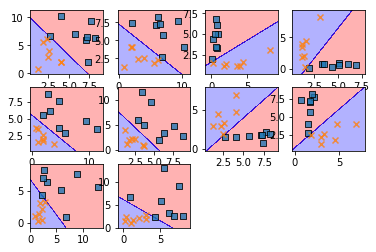

In [207]:
for k in range(10):
    xx = X.iloc[:,[top10.iloc[k,0],top10.iloc[k,1]]]
    xx = np.array(xx.values, dtype=float)
    y = y
    target_y = np.where(y == 'BRACA1', 1, 0)
    classifier.fit(xx, target_y)
    plt.subplot(3,4,k+1)
    plot_decision_regions(X=xx,y=target_y,classifier=classifier)
    



2.7) Faça um pequeno relatório explicando o código desenvolvido, os resultados obtidos e descreva como esse passo de seleção de características se encaixaria em uma aplicação que recebe os dados de genes de um paciente fora do dataset de treinamento e prediz a qual classe ele deve pertence.

**Escreva sua resposta aqui (use uma ou mais celulas - escreva código python se achar pertinente)**

No exercício acima, classificador do tipo SVM com kernel linear foi utilizado para achar 'biomarcadores' capazes de diferenciar entre duas classes (BRACA1 e BRACA2).

A seleção de features por SBS se mostrou computacionalmente custosa e inadequada para máquinas com capacidade computacional limitada, sendo assim, o método RFE foi utilizado. 

O 'escaneamento' par a par dentre as features selecionadas permitiu a identificação de pares de genes que contém informação suficiente para separar as duas classes. Em um contexto clínico-médico isso é interessante, pois permite, em tese, que apenas alguns genes sejam medidos (por métodos mais rápidos e baratos que métodos ômicos) e, a partir deles, decidir com boa confiança qual a classe do paciente.

Os pares de genes a seguir constituem boas indicações de biomarcadores que poderiam ser explorados e validados para prática cĺinica: 

In [212]:
 xx = X.iloc[:,[top10.iloc[k,0],top10.iloc[k,1]]]
    print(xx.columns.values)

['HV51G6' 'HV22G4']
['HV22G4' 'HV51G6']
['HV25C8' 'LO1A7']
['LO1A7' 'HV25C8']
['HV1F7' 'LO4E11']
['LO4E11' 'HV1F7']
['HV51G6' 'HV24F11']
['HV24F11' 'HV51G6']
['HV17H10' 'HV12E12']
['HV12E12' 'HV17H10']


## Exercício 3

3.1) Nesse exercício vamos trabalhar com os dados genômicos do artigo sobre Coronavirus apresentado pelo Marielton na disciplina (https://www.nature.com/articles/srep17155.pdf). Os dados disponíveis no web-site do artigo (http://bioinfo.ihb.ac.cn/seq2hosts/) foram baixados e estão localizados em na pasta: "dataset".

Nesse passo você deve carregar os dados das sequências que estão nos arquivos "dataset/seqs_4_training.fa.txt" e "dataset/seqs_4_test.fa.txt". Para o arquivo "dataset/seqs_4_training.fa.txt", você deve guardar as sequências em uma variável do tipo lista chamada "seq_train" e os hospedeiros em uma variável do tipo lista chamada "host_train", de forma que o hospedeiro host_train[i] está associado à sequência seq_gen[i]. Analogamente, você deve armazenar as sequências e o seu respectivo hospedeiro do arquivo "dataset/seqs_4_test.fa.txt" nas variáveis "seq_test" e "host_test", respectivamente.

Existem alguns elementos do conjunto de teste que possuem mais que um hospedeiro. Vamos considerar apenas o último hospedeiro marcado no arquivo. Então, a sequência que possui os hospedeiros: "host:human host:bovine" será considerada como hospedeiro bovino. Também vamos considerar apenas as amostras de treinamento e teste que sejam de algum hospedeiro do tipo "avian", "bat", "bovine", "human", "murine" ou "porcine". Você pode utilizar a lista "phost" no seu código para verificar se hospedeiro é de algum tipo que estamos analisando, ou seja,

**OBS**: Recomenda-se a instalação e a utilização da biblioteca Biopython ("https://biopython.org/") que possui a instalação via Anaconda (https://anaconda.org/anaconda/biopython) para leitura a manipulação de arquivos de sequência no formato "fasta".

**Dica:** As funções *find* (https://www.tutorialspoint.com/python/string_find.htm) e *rfind* (https://www.tutorialspoint.com/python/string_rfind.htm) de um objeto *string* podem ser úteis para a solução desse exercício.

In [112]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)
phost = ['avian', 'bat', 'bovine', 'human', 'murine', 'porcine']

training = open('./dataset/seqs_4_training.fa.txt', 'r')


from Bio import SeqIO
import pandas as pd

seq_train = []
host_train = []

seq_test = []
host_test = []

for record in SeqIO.parse(training, "fasta"):
    for host in phost:
        if record.description.find(host) != -1:
            seq_train.append(record.seq)
            seq_test.append(host)

host_code = {}

for index,item in enumerate(phost):
    host_code[item] = index


seq_host = []
for i in seq_test:
    seq_host.append(host_code[i])


3.2) Agora que já temos as sequências e os seus respetivos hospedeiros, vamos formatar nossas entradas em X e y para podermos utilizar os dados nas implementações de classificadores estudados até o momento. Vamos seguir o artigo nesse ponto e calcular um vetor com 19 características diferentes definidas como frequências de nucleotídeos (G, C e T) e o viés de dinucleotídeos definido por:
$$ \rho_{P,Q} = \frac{f_{PQ}}{f_P f_Q}, $$

onde $f_{P}$ é a frequência do nucleotídeo $P$, $f_Q$ é frequência nucleotídeo Q e $f_{PQ}$ é frequência do dinucleotídeo $PQ$.

A sua variável `X` deve ser uma matriz do Numpy (ndarray) tal que, cada linha corresponde a um vetor de 19 posições com as características definidas anteriormente, tal que `X[i]` corresponde as características da sequência `i`. A sua variável `y` deve conter os rótulos codificados em números dos hospedeiros, por exemplo, `y[i] = 0` se `host[i] = "avian"`, `y[i] = 1` se `host[i] = "bat"` e assim sucessivamente. Faça essa transformação para os dados de treinamento e de teste.

In [155]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

def freq(str,x):
    return str.count(x)/len(str)


features =[]

for string in seq_train:
    nc = ['A','T','C','G']
    new_feature = []
    for i in nc:
        new_feature.append(freq(string,i))
    
    for i in nc:
        for j in nc:
            dinuc = i + j
            bias = freq(string,dinuc) / (freq(string,i)*freq(string,j))
            new_feature.append(bias)
    new_feature.pop(0)
    features.append(new_feature)

seqs = pd.DataFrame(features)

print(seqs.head())

target_seqs = pd.DataFrame(seq_host)


         0         1         2         3         4         5         6   \
0  0.353208  0.181431  0.205849  0.872705  0.820859  1.308585  0.876979   
1  0.353259  0.181896  0.204668  0.887295  0.851712  1.251107  0.855309   
2  0.352975  0.181327  0.205807  0.885026  0.856436  1.256410  0.856831   
3  0.353829  0.181327  0.205807  0.878144  0.850974  1.260552  0.864995   
4  0.353544  0.181896  0.203814  0.879238  0.852256  1.260379  0.857017   

         7         8         9         10        11        12        13  \
0  0.845640  0.801108  0.700044  1.390212  1.380949  1.089942  0.750424   
1  0.854809  0.784681  0.730953  1.409485  1.341331  1.094214  0.731300   
2  0.850230  0.783662  0.733839  1.410655  1.359097  1.098535  0.735899   
3  0.863397  0.784431  0.723195  1.399432  1.339336  1.087010  0.744557   
4  0.864608  0.785695  0.717085  1.398450  1.338402  1.075628  0.739903   

         14        15        16        17        18  
0  0.509361  0.770678  1.077805  1.269600  0

3.3) Vamos agora utilizar os classificadores aprendidos em aula para encontrar a melhor solução. Crie os classificadores SVM com kernel radial, Árvore de Decisão e Floresta Aleatória com o critério de "Gini" e para os outros parâmetros utilizem a estratégia de *grid search* para encontrar os melhores valores, utilizando "precision" como critério de seleção e *5-fold* para a avaliação de *cross validation*. 

É indicado a utilização das classes de classificadores do scikit-learn, assim como a classe para a implementação do *grid search* (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [30]:
# import classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

/home/lubianat/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Treine os seus classificadores com o conjunto de dados transformados pelo exercício anterior (X_train e y_train), imprime os melhores parâmetros para cada classificador.

In [185]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

from sklearn.metrics import precision_score, make_scorer
score_precision = make_scorer(precision_score, average='micro')

import numpy as np

parameters = {'C' : [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0],
             'gamma':np.exp2(range(-15,3))}
svm =SVC(kernel='rbf')
clf_svm = GridSearchCV(estimator=svm, param_grid=parameters, scoring=score_precision, cv=5)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

seqs = scale.fit_transform(seqs)

clf_svm.fit(seqs, target_seqs.values.ravel())
print(clf_svm.best_params_)

parameters = {'C' :  np.arange(0.1, 10.0, 0.1),
             'gamma':np.exp2(range(-5,3))}
clf_svm = GridSearchCV(estimator=svm, param_grid=parameters, scoring=score_precision, cv=5)
clf_svm.fit(seqs, target_seqs.values.ravel())
print('Best parameters for svm classifier:', clf_svm.best_params_)






{'C': 1.0, 'gamma': 0.125}
Best parameters for svm classifier: {'C': 0.5, 'gamma': 0.125}


In [186]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)
import numpy as np

svm =SVC(kernel='rbf')
tree = DecisionTreeClassifier(criterion='gini')
rf = RandomForestClassifier(criterion='gini')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

parameters = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

clf_rf = GridSearchCV(estimator=rf, param_grid=parameters, scoring=score_precision, cv=5)

clf_rf.fit(seqs, target_seqs.values.ravel())
print('Best parameters for RF classifier:', clf_rf.best_params_)




Best parameters for RF classifier: {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [187]:
max_depths = [1,2,4,8,16, None]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
max_features = list(range(1,seqs.shape[1],1))

# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)
import numpy as np

tree = DecisionTreeClassifier(criterion='gini')

parameters = { 'max_features' :max_features,
               'max_depth': max_depths,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs,
               }

clf_tree = GridSearchCV(estimator=tree, param_grid=parameters, scoring=score_precision, cv=5)

clf_tree.fit(seqs, target_seqs.values.ravel())
print('Best parameters for Decision Tree classifier:', clf_tree.best_params_)


Best parameters for Decision Tree classifier: {'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


3.4) Utilize a técnica de PCA nos seus dados para reduzir a sua dimensionalidade para 2 e plote as regiões de decisões para classificadores com melhores resultados (uma plotagem para cada tipo de classificador: SVM, Árvore de Decisão e Floresta Aleatória).

In [42]:
# Escreva o código de sua resposta aqui (use uma ou mais celulas - escreva texto se achar pertinente)

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(seqs)

pca_for_plot = pca.transform(seqs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

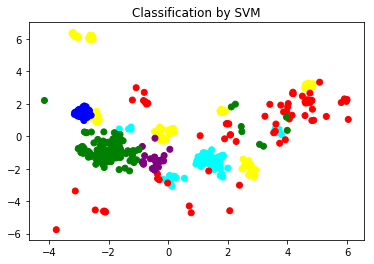

In [192]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

%run ml/mlplot.py
colormap = ['green', 'red', 'blue', 'yellow', 'purple', 'cyan']
seq_host = np.array(seq_host)

color_dict = {}
for index,item in enumerate(colormap):
    color_dict[index] = item
    

svm = SVC(kernel='rbf', C= 0.5, gamma= 0.125)
svm.fit(seqs,seq_host)
classes = svm.predict(seqs)

    
colours = []
for i in classes:
    colours.append(color_dict[i])

plt.scatter(pca_for_plot[:,0], pca_for_plot[:,1], c = colours)
plt.title('Classification by SVM')
plt.show()

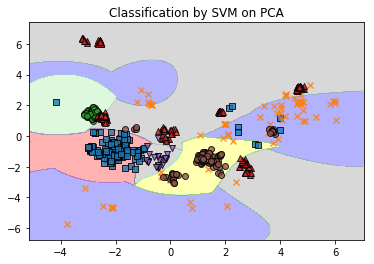

In [191]:
#the classifier was also run on the PCA transformed samples
#of notice, the parameters obtained by the grid search were not optimal 
#as they were obtained for the untrasformed samples

pca_svm = SVC(kernel='rbf', C= 0.5, gamma= 0.125)
pca_svm.fit(pca_for_plot,seq_host)



plot_decision_regions(pca_for_plot[:,[0,1]],seq_host, pca_svm)
plt.title('Classification by SVM on PCA')
plt.show()

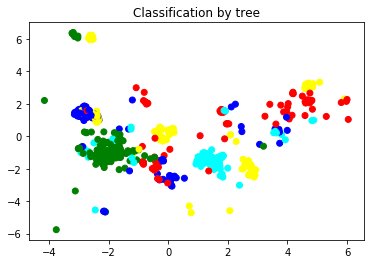

In [197]:
tree = DecisionTreeClassifier(criterion='gini',max_depth =  8, max_features = 6, min_samples_leaf = 0.1, min_samples_split= 0.1)

color_dict = {}
for index,item in enumerate(colormap):
    color_dict[index] = item
    
tree.fit(seqs,seq_host)

classes = tree.predict(seqs)
colours = []
for i in classes:
    colours.append(color_dict[i])

plt.scatter(pca_for_plot[:,0], pca_for_plot[:,1], c = colours)
plt.title('Classification by tree')
plt.show()


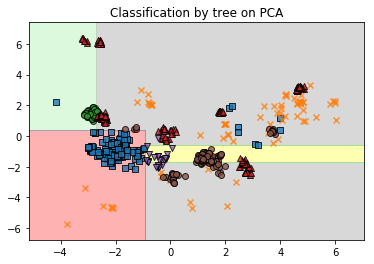

In [198]:
#max features was modified due to incompatibility

pca_tree = DecisionTreeClassifier(criterion='gini',max_depth =  8, max_features = 2, min_samples_leaf = 0.1, min_samples_split= 0.1)
pca_tree.fit(pca_for_plot,seq_host)


plot_decision_regions(pca_for_plot[:,[0,1]],seq_host, pca_tree)
plt.title('Classification by tree on PCA')
plt.show()

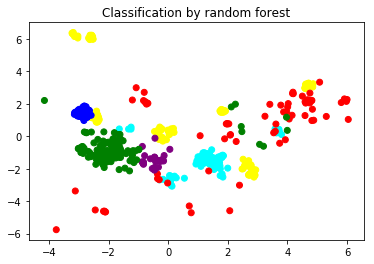

In [193]:
rf = RandomForestClassifier(criterion='gini', max_depth= 100, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)

rf.fit(seqs,seq_host)

classes = rf.predict(seqs)
    
    
colours = []
for i in classes:
    colours.append(color_dict[i])

plt.scatter(pca_for_plot[:,0], pca_for_plot[:,1], c = colours)
plt.title('Classification by random forest')
plt.show()




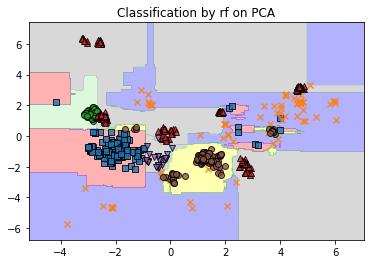

In [194]:
pca_rf =  RandomForestClassifier(criterion='gini', max_depth= 100, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)

pca_rf.fit(pca_for_plot,seq_host)

classes = rf.predict(seqs)
    
    
colours = []
for i in classes:
    colours.append(color_dict[i])

plot_decision_regions(pca_for_plot[:,[0,1]],seq_host, pca_rf)
plt.title('Classification by rf on PCA')
plt.show()